In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
import seaborn as sns

In this notebook we will use Python to examine voter registration and turnout statistics for the state of Hawaii, and attempt to identify trends in voter behavior. Later we will join this data with US Census data in order to attempt to answer the question - "How much does one vote matter?"

I can't find a csv with the information I'm looking for so instead I'll create the df from scratch. Hawaii became a state in 1959 and conducted elections for Senate that year. Then there was an election every two years in line with the federal schedule beginning in 1960. Rather than type every year, we'll generate a list using a for loop.

In [77]:
#initialize an empty list for election years
year = []

 #initialize a loop incrementing year by 2 between 1960 and 2022. Convert the result of each iteration to a string and append it to the empty list 'year'
for i in range(1960,2024, 2):
    year.append(str(i))

#insert the 1959 election at index zero
year.insert(0,'1959')

#print the list to ensure we've done it correctly
print(year)

['1959', '1960', '1962', '1964', '1966', '1968', '1970', '1972', '1974', '1976', '1978', '1980', '1982', '1984', '1986', '1988', '1990', '1992', '1994', '1996', '1998', '2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016', '2018', '2020', '2022']


Excellent, passing this list into our df will save a lot of typing. Unfortunately, the rest will have to be done one at a time by hand using the election information I found here: https://elections.hawaii.gov/resources/registration-voter-turnout-statistics/
Your local county or state will keep similar records, which you can use to copy this project and make it your own. If you're lucky they may even share a csv.

In [78]:
#We'll create our df from a dictionary using the key:values pair format. We can pass our list 'year' for the first parameter and then get to typing. 
election_summary_data = {
    'Year' : year,
    'Registered_Voters_Primary': [123298,137619,157022,170857,187485,204679,219379,253752,256097,268110,295581,284013,284253,292201,292653,308140,314832,304539,335173,377287,411071,439934,464673,430285,447727,450522,460244,461896,466553,483076,490408,525153,562630],
    'Voter_Turnout_Primary': [102274,94149,123321,111946,129677,124694,152557,151735,178729,189267,219379,196283,197904,153275,208640,201358,188640,172039,225406,199201,201583,189432,192146,184860,192322,167047,207461,206105,202728,169531,189421,275744,228522],
    'Registered_Voters_General': [130711,147123,164324,180179,193107,211853,226633,263597,263849,275479,301758,297533,300171,308426,308808,325614,326452,328463,349457,386546,423875,444945,470327,445253,452168,466499,464387,474554,472556,498590,500163,549935,566873],
    'Voter_Turnout_General': [121999,136812,147728,161913,166187,183166,189812,220594,205903,234152,219584,234469,239970,258811,253470,270223,252621,272081,269121,261781,291114,257840,270071,300265,239753,308443,266266,298815,249436,291446,262700,385442,277194]

}

df = pd.DataFrame.from_dict(election_summary_data)
print(df.head())

   Year  Registered_Voters_Primary  Voter_Turnout_Primary  \
0  1959                     123298                 102274   
1  1960                     137619                  94149   
2  1962                     157022                 123321   
3  1964                     170857                 111946   
4  1966                     187485                 129677   

   Registered_Voters_General  Voter_Turnout_General  
0                     130711                 121999  
1                     147123                 136812  
2                     164324                 147728  
3                     180179                 161913  
4                     193107                 166187  


Cool, df looks great! Now let's vizualize to ensure it all looks good. Since we copied these numbers by hand we'll want to vizualize to ensure that we didn't miss a digit or make any goofs.

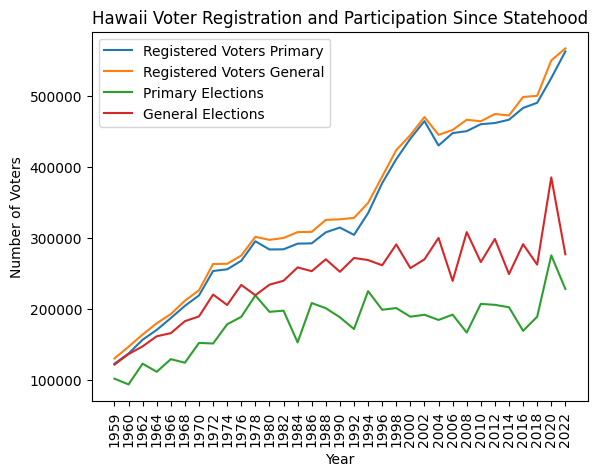

In [79]:
#i really want to plot the mean here instead of two lines of registered voters but i need to figure out how
mean_registered_voters = ((df['Registered_Voters_Primary']+df['Registered_Voters_General'])/2)

plt.plot('Year','Registered_Voters_Primary', data= df, label = 'Registered Voters Primary')
plt.plot('Year','Registered_Voters_General', data= df, label = 'Registered Voters General')
plt.plot('Year','Voter_Turnout_Primary', data= df, label = 'Primary Elections')
plt.plot('Year','Voter_Turnout_General', data= df, label = 'General Elections')
plt.xticks(rotation = 90)
plt.ylabel('Number of Voters')
plt.xlabel('Year')
plt.title('Hawaii Voter Registration and Participation Since Statehood')
plt.legend()
plt.show()

Cool, in terms of elections, 2020 draws our attention immediately as an extreme outlier. The close correlation of the primary and general election spikes lead me to believe that this data was entered correctly but I check the source material anyway. The measures are correct. The 1984 primary election turnout dip also looks odd to me, but looking at the source material I can confirm I've recorded it correctly. 

No matter what municipality's data you're working with you will also observe rapid rises in the number of registered voters beginning around 1993. This is thanks to the National Voter Registration Act of 1993 (NVRA), also known as the Moter Voter Act. This act required all states to provide the opportunity to register each time a person visits the DMV. It was succesful in expanding access to the ballot box, as evidenced by the increase in registered voters. We can mark the NVRA as a point of interest on the graph:

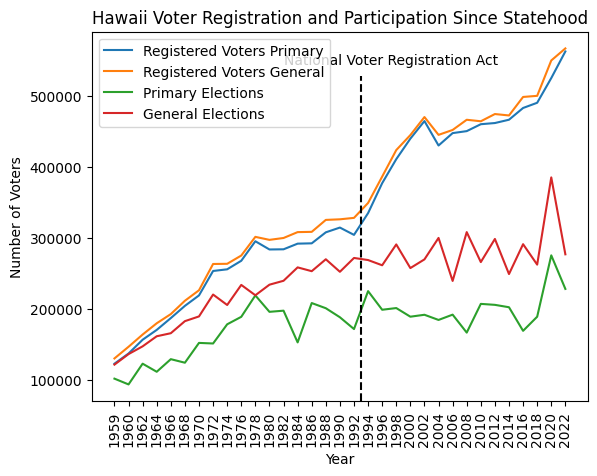

In [80]:
plt.plot('Year','Registered_Voters_Primary', data= df, label = 'Registered Voters Primary')
plt.plot('Year','Registered_Voters_General', data= df, label = 'Registered Voters General')
plt.plot('Year','Voter_Turnout_Primary', data= df, label = 'Primary Elections')
plt.plot('Year','Voter_Turnout_General', data= df, label = 'General Elections')
plt.xticks(rotation = 90)
plt.ylabel('Number of Voters')
plt.xlabel('Year')
plt.title('Hawaii Voter Registration and Participation Since Statehood')
plt.legend()
# Adding the implementation of the NVRA to explain the sudden spike in registration. 
plt.axvline(x = 17.5, ymin = 0, ymax = 0.88, ls = '--', color = 'black')
plt.text(12, 545000, 'National Voter Registration Act')

plt.show()


At this point in the process, if you have other anomalies, you should review your data and source material to ensure that your data entry was correct. For instance - we can see that general election turnout exceeds primary turnout in every election, so if you have a data point where the primary turnout significantly exceeds general turnout you may have made an error.

Now, voter turnout is hardly ever discussed as raw totals, instead we here turnout stated as a percentage of total registered voters. Let's go ahead and perform some calculations, then add voter turnout as a percentage to our dataframe:

In [83]:
df['Percent_Turnout_Primary'] = round((df['Voter_Turnout_Primary']/df['Registered_Voters_Primary'])*100,2)
df['Percent_Turnout_General'] = round((df['Voter_Turnout_General']/df['Registered_Voters_General'])*100,2)
print(df)

    Year  Registered_Voters_Primary  Voter_Turnout_Primary  \
0   1959                     123298                 102274   
1   1960                     137619                  94149   
2   1962                     157022                 123321   
3   1964                     170857                 111946   
4   1966                     187485                 129677   
5   1968                     204679                 124694   
6   1970                     219379                 152557   
7   1972                     253752                 151735   
8   1974                     256097                 178729   
9   1976                     268110                 189267   
10  1978                     295581                 219379   
11  1980                     284013                 196283   
12  1982                     284253                 197904   
13  1984                     292201                 153275   
14  1986                     292653                 208640   
15  1988

Next we'll plot the voter turnout as a percentage of registered voters:

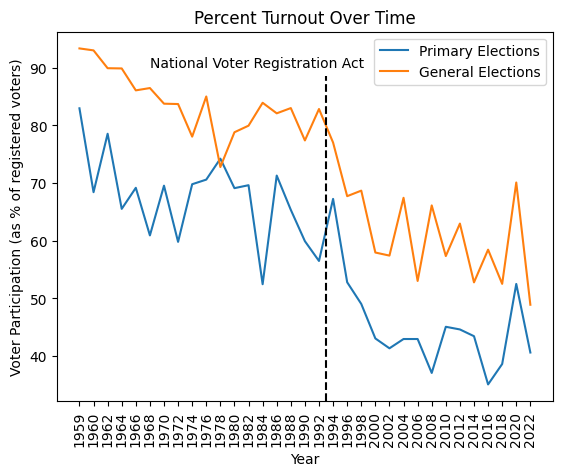

In [88]:
plt.plot('Year','Percent_Turnout_Primary', data= df, label = 'Primary Elections')
plt.plot('Year','Percent_Turnout_General', data= df, label = 'General Elections')
plt.xticks(rotation = 90)
plt.ylabel('Voter Participation (as % of registered voters)')
plt.xlabel('Year')
plt.title('Percent Turnout Over Time')
plt.axvline(x = 17.5, ymin = 0, ymax = 0.88, ls = '--', color = 'black')
plt.text(5, 90, 'National Voter Registration Act')
plt.legend()
plt.show()

We've uncovered and interesting insight - despite the increase in raw totals that we've seen over time, the rate of newly registered voters has far outpaced the rate of participation, resulting in a negative trend in voter participation over time. Recall in the previous graph we plotted the passage of the NVRA to explain the sharp increase in voter registration. Here we see the inverse of that relationship, where the passage of the NVRA results in a precipitous decline in participation over time as a percent of the whole. Perhaps we can explore this relationship further...

Before we do I'd like to investigate two other well know election participation phenomenon - 1. There is generally higher turnout for general elections than primaries, and 2. There is generally higher turnout for presidential elections than there is for midterms.

Lets begin subsetting the df for presidential election years:

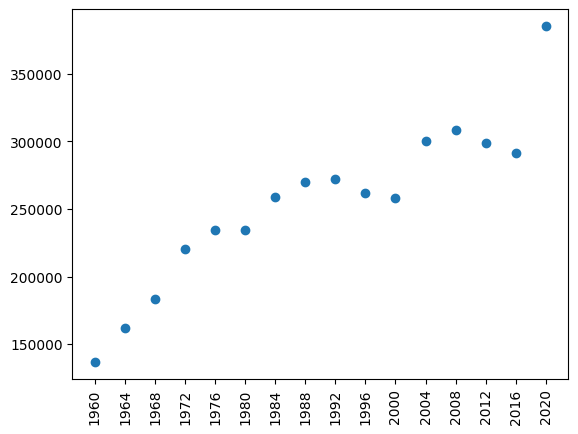

In [93]:
presidential_elections = df.iloc[1::2]
midterm_elections = df.iloc[2::2]
plt.scatter(data = presidential_elections, x='Year', y='Voter_Turnout_General')
plt.xticks(rotation = 90)
plt.show()